# Test Case 1 - Single Capacitor

In [1]:
from CircuitCalculator.Circuit.state_space_model import state_space_model_v2
from CircuitCalculator.Circuit.circuit import Circuit
from CircuitCalculator.Circuit import components as cmp
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

## Setup Circuit

In [2]:
R1, R2, R3 = 10, 20, 30
C = 1e-3
V0 = 5
circuit = Circuit([
    cmp.dc_voltage_source(id='Uq', V=V0, nodes=('1', '0')),
    cmp.resistor(id='R1', R=R1, nodes=('1', '2')),
    cmp.resistor(id='R2', R=R2, nodes=('2', '0')),
    cmp.resistor(id='R3', R=R3, nodes=('2', '3')),
    cmp.capacitor(id='C', C=C, nodes=('3', '0')),
    cmp.ground(nodes=('0',))
])

### Setup Solution

In [3]:
def step(t: np.ndarray) -> np.ndarray:
    return np.heaviside(t, 1)

In [4]:
t_max = 0.3
t0 = 0.1
Ts = 0.0003
t = np.arange(0, t_max, Ts)
V = V0*step(t-t0)

### Calculate Solution

In [5]:
ss = state_space_model_v2(circuit=circuit, potential_nodes=['1', '2', '3'], voltage_ids=['Uq', 'R1', 'R2', 'R3', 'C'], current_ids=['Uq', 'R1', 'R2', 'R3', 'C'])
sys = signal.StateSpace(ss.A, ss.B, ss.C, ss.D)
tout, yout, out = signal.lsim(sys, V, t)

### Calculate Reference Solution

In [6]:
def pll(R1, R2):
    return R1*R2/(R1+R2)

Ri = pll(R1, R2)+R3
tau = Ri*C
u2_ref = V*R2/(R1+R2)*(1+(R3*C/tau-1)*(np.exp(-(tout-t0)/tau)))
uc_ref = V*R2/(R1+R2)*(1-np.exp(-(tout-t0)/tau))
u3_ref = u2_ref - uc_ref
u1_ref = V - u2_ref

i1_ref = u1_ref/R1
i2_ref = u2_ref/R2
i3_ref = u3_ref/R3
ic_ref = C*V*R2/(R1+R2)/tau*np.exp(-(tout-t0)/tau)

### Plot Solution

(0.0, 0.3)

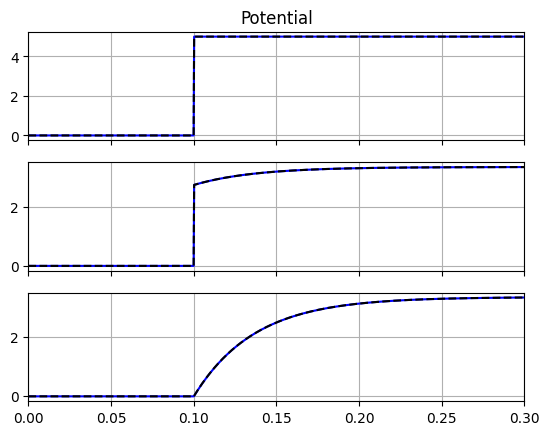

In [7]:
_, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(tout, yout[:,0], 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Potential')

ax[1].plot(tout, yout[:,1], 'b-')
ax[1].plot(tout, u2_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,2], 'b-')
ax[2].plot(tout, uc_ref, 'k--')
ax[2].grid(True)
ax[2].set_xlim((0, t_max))

(0.0, 0.3)

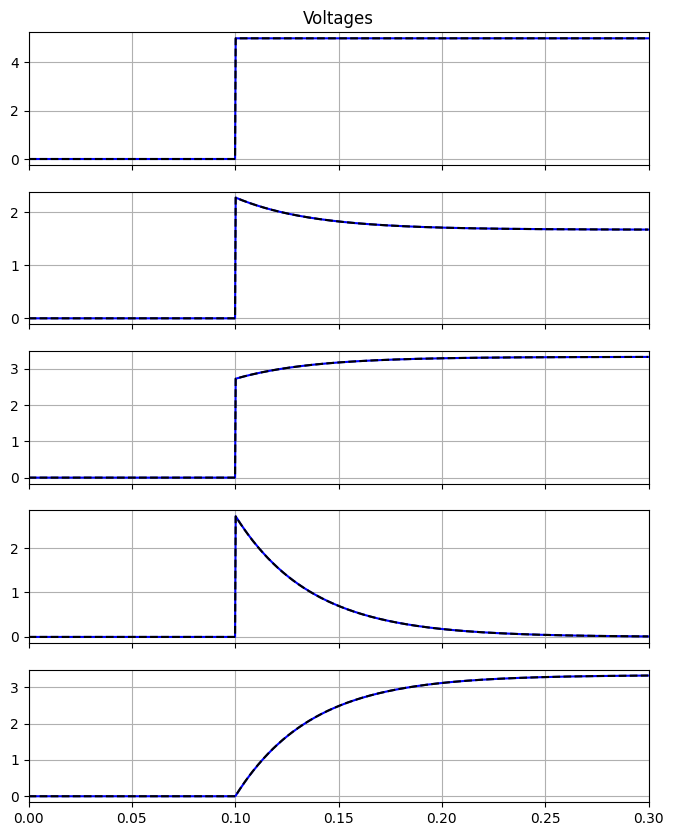

In [8]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,3], 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Voltages')

ax[1].plot(tout, yout[:,4], 'b-')
ax[1].plot(tout, u1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,5], 'b-')
ax[2].plot(tout, u2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,6], 'b-')
ax[3].plot(tout, u3_ref, 'k--')
ax[3].grid(True)

ax[4].plot(tout, yout[:,7], 'b-')
ax[4].plot(tout, uc_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))

(0.0, 0.3)

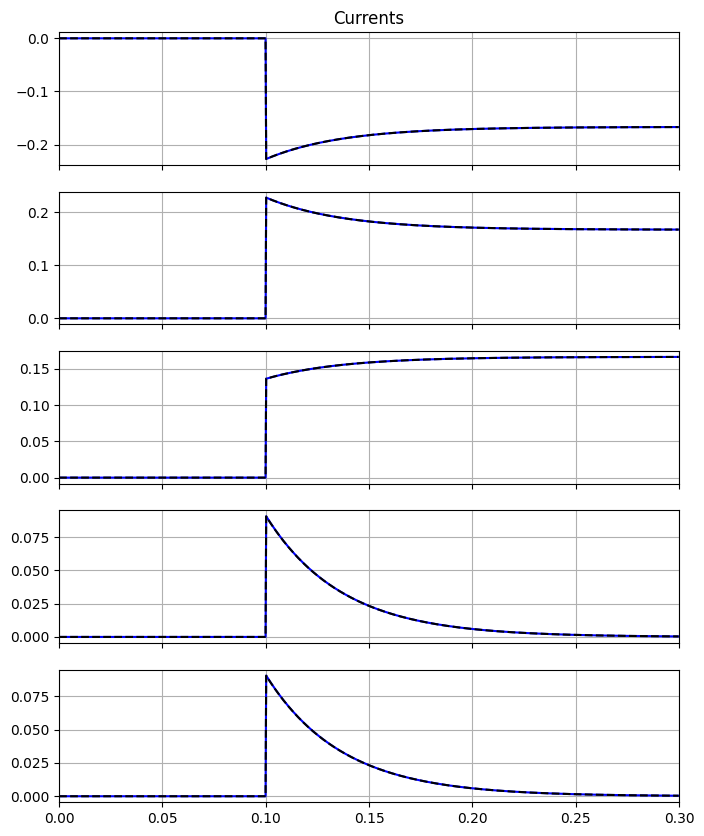

In [9]:
_, ax = plt.subplots(nrows=5, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,8], 'b-')
ax[0].plot(t, -i1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Currents')

ax[1].plot(tout, yout[:,9], 'b-')
ax[1].plot(tout, i1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,10], 'b-')
ax[2].plot(tout, i2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,11], 'b-')
ax[3].plot(tout, i3_ref, 'k--')
ax[3].grid(True)

ax[4].plot(tout, yout[:,12], 'b-')
ax[4].plot(tout, ic_ref, 'k--')
ax[4].grid(True)
ax[4].set_xlim((0, t_max))